## Retrieve Frequency Counts for Users

In [161]:
import os, json
from os import path
import pandas as pd
import numpy as np
import glob
pd.set_option('display.max_columns', None)

#FJERN POLITIFACT 14548 - 1054731691875618829 ELLER KJØR MED ERRORS=SURROGATEESCAPE 
#GJENTA FOR REAL

fakeUsers = {}
realUsers = {}

for i in range(2):
    if i == 0:
        authenticity = 'fake'
    else:
        authenticity = 'real'
    rootdir = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity
    
    for subdir, dirs, articles in os.walk(rootdir):
        for article in dirs:
            #print(subdir)
            temp = pd.DataFrame()
            #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/tweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/' + authenticity + '/'+ article + '/tweets' 
            #print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
                #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True)
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])


        #FINN UNIKE VERDIER UNDER USER I TEMP: 
            users = list() #LAG LISTE HELLER
            if "user" in temp.keys():
                for dic in temp["user"]:
                    if dic['id'] not in users:
                        users.append(dic['id'])
        
            temp = pd.DataFrame()        
        #path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/fake/politifact11773/retweets' 
            path_to_json = 'C:/Users/henri/FakenewsData/fakenewsnet_data/fakenewsnet_data/politifact/'+authenticity+'/'+article+'/retweets' 
            #print(path_to_json)
            json_pattern = os.path.join(path_to_json,'*.json')
            file_list = glob.glob(json_pattern)

            for file in file_list:
            #print(file)
                try:
                    data = pd.read_json(open(file, "r", encoding="utf8", errors="surrogateescape"), lines=True)
                    temp = temp.append(data, ignore_index = True)
                    break
                except ValueError:
                    print("ValueError")
        #print(temp["user"][0]['id'])
        #print(temp['retweets'][13][0]['user']['id'])



        #FINN UNIKE VERDIER UNDER USER I TEMP: 
        #users = list() #LAG LISTE HELLER
            if "retweets" in temp.keys():
                for lst in temp["retweets"]:
                    if len(lst)>0:
                        #print(lst)
                        if lst[0]['user']['id'] not in users:
                            users.append(lst[0]['user']['id'])

            if i == 0:
            #Initialize dict
                for user in users:
                    if user not in fakeUsers.keys():
                        fakeUsers[user] = 0
            #increment usercounts
                for fakeUser in fakeUsers:
                    fakeUsers[fakeUser] = fakeUsers[fakeUser]+1
                #print(fakeUsers)
            elif i == 1:
                #Initialize dict
                for user in users:
                    if user not in realUsers.keys():
                        realUsers[user] = 0
                #increment usercounts
                for realUser in realUsers:
                    realUsers[realUser] = realUsers[realUser]+1
                #print(realUsers)
    #if authenticity == 'fake':
    #    realUsersPD['fake'] = 'true'
    #else:
    #    fakeUsersPD['fake'] = 'false'
    
#for articles..
#fakeArticles.append('politifact11773') #legg til alle articles for plot

## Plot tweetcount per user and label real/fake

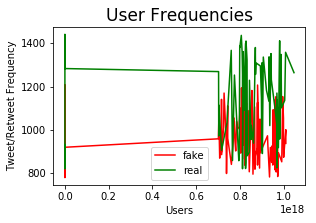

In [162]:
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)

ax.plot(x, y, 'r', label='fake')

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

ax.plot(x, y, 'g', label='real')

ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequency')
ax.legend()
plt.title("User Frequencies", fontsize=17)
plt.show()

## Histogram Plot for Users/Tweets with Labels

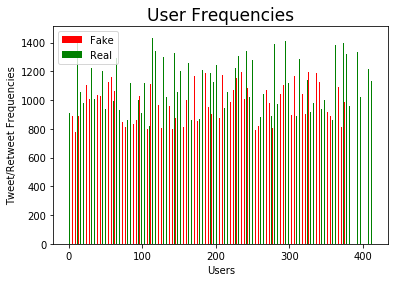

In [163]:
lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

lists2 = sorted(realUsers.items()) # sorted by key, return a list of tuples

x2, y2 = zip(*lists2) # unpack a list of pairs into two tuples

ax = plt.subplot(111)
ax.bar(np.arange(len(x)), y, width=0.2, color='r', align='center')
ax.bar(np.arange(len(x2))-0.2, y2, width=0.2, color='g', align='center')
ax.legend(('Fake','Real'))
ax.set_xlabel('Users')
ax.set_ylabel('Tweet/Retweet Frequencies')
plt.title("User Frequencies", fontsize=17)
plt.show()

## Kernel Density Function (KDE) Histogram for Users/Tweets with Labels

C:\Users\henri\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


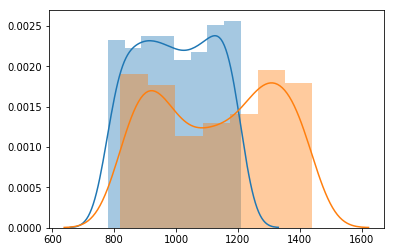

In [164]:
import seaborn as sns
import matplotlib.pylab as plt

lists = sorted(fakeUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)

lists = sorted(realUsers.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

sns.distplot(y)